# Set up 

In [1]:
SEED = 1
import random

import tellurium as te
import pandas as pd
import numpy as np
np.random.seed(SEED)

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

import aesara.tensor as at
import aesara
floatX = aesara.config.floatX
import pymc as pm
import numpy as np

import cobra
import os

from scipy import stats
import scipy as sp
import math

import gzip
import cloudpickle

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
os.chdir('../../..')
from src import antemll, util
import emll
from emll.aesara_utils import LeastSquaresSolve
os.chdir('notebooks/topologyA/omitted_data/')

In [3]:
Teusink_ant ='../../../models/Antimony/topologyA-noReg.ant' 
r = te.loada(Teusink_ant)
r.conservedMoietyAnalysis = True
r.steadyState()

1.5710734600032811e-15

In [4]:
pt_levels = [0.1, 0.2, 0.3, 0.4 ,0.5, 1.5, 3, 5, 7, 10]
pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.5x', '3x', '5x', '7x', '10x']

In [5]:
enzymes = ['e_' + i for i in r.getReactionIds()]
internal = r.getFloatingSpeciesIds()
external = r.getBoundarySpeciesIds()
fluxes = ['v_' + i for i in r.getReactionIds()]

## Leaving out enzyme data

In [6]:
data0 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_0.csv')[fluxes+internal+external]
data01 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_0.1.csv')[fluxes+internal+external]
data02 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_0.2.csv')[fluxes+internal+external]
data03 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_0.3.csv')[fluxes+internal+external]
data04 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_0.4.csv')[fluxes+internal+external]
data05 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_0.5.csv')[fluxes+internal+external]

data15 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_1.5.csv')[fluxes+internal+external]
data3 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_3.csv')[fluxes+internal+external]
data5 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_5.csv')[fluxes+internal+external]
data7 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_7.csv')[fluxes+internal+external]
data100 = pd.read_csv('../../../data/generated_data/topologyA-noReg/topologyA-noReg_10.csv')[fluxes+internal+external]

In [7]:
BMCA_obj0 = antemll.antemll(Teusink_ant, data0, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj01 = antemll.antemll(Teusink_ant, data01, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj02 = antemll.antemll(Teusink_ant, data02, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj03 = antemll.antemll(Teusink_ant, data03, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj04 = antemll.antemll(Teusink_ant, data04, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj05 = antemll.antemll(Teusink_ant, data05, '../../../models/sbml/topologyA_cobra.xml')

BMCA_obj15 = antemll.antemll(Teusink_ant, data15, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj3 = antemll.antemll(Teusink_ant, data3, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj5 = antemll.antemll(Teusink_ant, data5, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj7 = antemll.antemll(Teusink_ant, data7, '../../../models/sbml/topologyA_cobra.xml')
BMCA_obj100 = antemll.antemll(Teusink_ant, data100, '../../../models/sbml/topologyA_cobra.xml')


c:\Users\user\miniconda3\envs\gayles\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning:

divide by zero encountered in log

No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../../../models/Antimony/topologyA_cobra.ant


## Running ADVI

In [ ]:
def run_BayesInf(BMCA_obj, n_samp=1):
    np.random.seed(SEED)
    random.seed(SEED)

    
    enzymes = ['e_' + i for i in r.getReactionIds()]
        
    known_e_inds = []
    omitted_e_inds = []
    for i, e in enumerate(enzymes):
        if e in data100.columns:
            known_e_inds.append(i)
        else: 
            omitted_e_inds.append(i)
    e_inds = np.hstack([known_e_inds, omitted_e_inds]).argsort()

    with pm.Model() as pymc_model:

        # Initialize elasticities
        Ex_t = pm.Deterministic('Ex', util.initialize_elasticity(BMCA_obj.Ex.to_numpy(), name='Ex'))
        Ey_t = pm.Deterministic('Ey', util.initialize_elasticity(BMCA_obj.Ey.to_numpy(), name='Ey'))
        
        #Protein Expression Priors
        e_measured = pm.Normal('e_measured', mu=1, sigma=0.1, observed=BMCA_obj.en.T)
        e_unmeasured = pm.Normal('e_unmeasured', mu=1, sigma=0.1, shape=(len(omitted_e_inds), len(BMCA_obj.en)))
        e_t = at.concatenate([e_measured, e_unmeasured], axis=0)[e_inds, :]
        pm.Deterministic('e_t', e_t)
        
        chi_t = pm.Normal('chi_t', mu=0, sigma=0.5, observed=BMCA_obj.xn.T)
        y_t = pm.Normal('y_t', mu=0, sigma=0.5, observed=BMCA_obj.yn.T)
        
        likelihood = pm.Deterministic('vn', e_t * (np.ones((len(e_inds), len(BMCA_obj.en))) + pm.math.dot(Ex_t,chi_t) + pm.math.dot(Ey_t,y_t)))
        v_hat_obs = pm.Normal('v_hat_obs', mu=likelihood, sigma=0.1, observed=BMCA_obj.vn.squeeze().T)
        
        N_ITERATIONS = 20000

        advi = pm.ADVI(random_seed=SEED)
        tracker = pm.callbacks.Tracker(
            mean = advi.approx.mean.eval,
            std = advi.approx.std.eval
        )
    
        approx = advi.fit(
            n=N_ITERATIONS, 
            callbacks = [tracker],
            obj_optimizer=pm.adagrad_window(learning_rate=1E-1), 
            total_grad_norm_constraint=0.7,
            obj_n_mc=1)


    with sns.plotting_context('notebook', font_scale=1.2):

        fig = plt.figure(figsize=(5,4))
        plt.plot(approx.hist + 30, '.', rasterized=True, ms=1)
        # plt.ylim([-1E1, 1E3])
        plt.xlim([0, N_ITERATIONS])
        sns.despine(trim=True, offset=10)

        plt.ylabel('-ELBO')
        plt.xlabel('Iteration')
        plt.title('in vitro ADVI convergence')
        plt.tight_layout()

    if n_samp > 1:
        samples = []
        for i in range(n_samp): 
            samples.append(approx.sample(draws=1000))
        return samples
    else:
        return approx.sample(draws=1000, random_seed=SEED)

In [9]:
trace0 = run_BayesInf(BMCA_obj0, n_samp=3)

c:\Users\user\miniconda3\envs\gayles\lib\site-packages\aesara\scalar\basic.py:2925: RuntimeWarning:

invalid value encountered in log



FloatingPointError: NaN occurred in optimization. 
The current approximation of RV `Ex_kinetic_entries`.ravel()[0] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[1] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[2] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[3] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[4] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[5] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[6] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[7] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[8] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[9] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[10] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[11] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[12] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[13] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[14] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[15] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[16] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[17] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[18] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[19] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[20] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[21] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[22] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[23] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[24] is NaN.
The current approximation of RV `Ex_kinetic_entries`.ravel()[25] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[0] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[1] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[2] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[3] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[4] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[5] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[6] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[7] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[8] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[9] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[10] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[11] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[12] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[13] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[14] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[15] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[16] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[17] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[18] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[19] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[20] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[21] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[22] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[23] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[24] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[25] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[26] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[27] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[28] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[29] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[30] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[31] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[32] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[33] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[34] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[35] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[36] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[37] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[38] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[39] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[40] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[41] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[42] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[43] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[44] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[45] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[46] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[47] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[48] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[49] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[50] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[51] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[52] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[53] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[54] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[55] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[56] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[57] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[58] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[59] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[60] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[61] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[62] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[63] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[64] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[65] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[66] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[67] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[68] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[69] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[70] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[71] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[72] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[73] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[74] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[75] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[76] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[77] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[78] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[79] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[80] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[81] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[82] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[83] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[84] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[85] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[86] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[87] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[88] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[89] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[90] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[91] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[92] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[93] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[94] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[95] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[96] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[97] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[98] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[99] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[100] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[101] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[102] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[103] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[104] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[105] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[106] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[107] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[108] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[109] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[110] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[111] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[112] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[113] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[114] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[115] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[116] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[117] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[118] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[119] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[120] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[121] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[122] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[123] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[124] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[125] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[126] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[127] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[128] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[129] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[130] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[131] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[132] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[133] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[134] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[135] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[136] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[137] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[138] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[139] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[140] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[141] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[142] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[143] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[144] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[145] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[146] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[147] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[148] is NaN.
The current approximation of RV `Ex_capacity_entries`.ravel()[149] is NaN.
The current approximation of RV `Ey_kinetic_entries`.ravel()[0] is NaN.
The current approximation of RV `Ey_kinetic_entries`.ravel()[1] is NaN.
The current approximation of RV `Ey_kinetic_entries`.ravel()[2] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[0] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[1] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[2] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[3] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[4] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[5] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[6] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[7] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[8] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[9] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[10] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[11] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[12] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[13] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[14] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[15] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[16] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[17] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[18] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[19] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[20] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[21] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[22] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[23] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[24] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[25] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[26] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[27] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[28] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[29] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[30] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[31] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[32] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[33] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[34] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[35] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[36] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[37] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[38] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[39] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[40] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[41] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[42] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[43] is NaN.
The current approximation of RV `Ey_capacity_entries`.ravel()[44] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[0] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[1] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[2] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[3] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[4] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[5] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[6] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[7] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[8] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[9] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[10] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[11] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[12] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[13] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[14] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[15] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[16] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[17] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[18] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[19] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[20] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[21] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[22] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[23] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[24] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[25] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[26] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[27] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[28] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[29] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[30] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[31] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[32] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[33] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[34] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[35] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[36] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[37] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[38] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[39] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[40] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[41] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[42] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[43] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[44] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[45] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[46] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[47] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[48] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[49] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[50] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[51] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[52] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[53] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[54] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[55] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[56] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[57] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[58] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[59] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[60] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[61] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[62] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[63] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[64] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[65] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[66] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[67] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[68] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[69] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[70] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[71] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[72] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[73] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[74] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[75] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[76] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[77] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[78] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[79] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[80] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[81] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[82] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[83] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[84] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[85] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[86] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[87] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[88] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[89] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[90] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[91] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[92] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[93] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[94] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[95] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[96] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[97] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[98] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[99] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[100] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[101] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[102] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[103] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[104] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[105] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[106] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[107] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[108] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[109] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[110] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[111] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[112] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[113] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[114] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[115] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[116] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[117] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[118] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[119] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[120] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[121] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[122] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[123] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[124] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[125] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[126] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[127] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[128] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[129] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[130] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[131] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[132] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[133] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[134] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[135] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[136] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[137] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[138] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[139] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[140] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[141] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[142] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[143] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[144] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[145] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[146] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[147] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[148] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[149] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[150] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[151] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[152] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[153] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[154] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[155] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[156] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[157] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[158] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[159] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[160] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[161] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[162] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[163] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[164] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[165] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[166] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[167] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[168] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[169] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[170] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[171] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[172] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[173] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[174] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[175] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[176] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[177] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[178] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[179] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[180] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[181] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[182] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[183] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[184] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[185] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[186] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[187] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[188] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[189] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[190] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[191] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[192] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[193] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[194] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[195] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[196] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[197] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[198] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[199] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[200] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[201] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[202] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[203] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[204] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[205] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[206] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[207] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[208] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[209] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[210] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[211] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[212] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[213] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[214] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[215] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[216] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[217] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[218] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[219] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[220] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[221] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[222] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[223] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[224] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[225] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[226] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[227] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[228] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[229] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[230] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[231] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[232] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[233] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[234] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[235] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[236] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[237] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[238] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[239] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[240] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[241] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[242] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[243] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[244] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[245] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[246] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[247] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[248] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[249] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[250] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[251] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[252] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[253] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[254] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[255] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[256] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[257] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[258] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[259] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[260] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[261] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[262] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[263] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[264] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[265] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[266] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[267] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[268] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[269] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[270] is NaN.
The current approximation of RV `e_unmeasured`.ravel()[271] is NaN.
Try tracking this parameter: http://docs.pymc.io/notebooks/variational_api_quickstart.html#Tracking-parameters

In [ ]:
trace0 = run_BayesInf(BMCA_obj0, n_samp=3)
trace01 = run_BayesInf(BMCA_obj01, n_samp=3)
trace02 = run_BayesInf(BMCA_obj02, n_samp=3)
trace03 = run_BayesInf(BMCA_obj03, n_samp=3)
trace04 = run_BayesInf(BMCA_obj04, n_samp=3)
trace05 = run_BayesInf(BMCA_obj05, n_samp=3)

trace15 = run_BayesInf(BMCA_obj15, n_samp=3)
trace3 = run_BayesInf(BMCA_obj3, n_samp=3)
trace5 = run_BayesInf(BMCA_obj5, n_samp=3)
trace7 = run_BayesInf(BMCA_obj7, n_samp=3)
trace100 = run_BayesInf(BMCA_obj100, n_samp=3)

### saving trace data

In [ ]:
with gzip.open("topologyA-noReg_omitEnzymes_traces.pgz", "wb") as f:
            cloudpickle.dump(
                {
                "trace0":trace0,
                "trace01":trace01,
                "trace02":trace02,
                "trace03":trace03,
                "trace04":trace04,
                "trace05":trace05,
                
                "trace15":trace15,
                "trace3":trace3,
                "trace5":trace5,
                "trace7":trace7,
                "trace100":trace100
                },
                f,
            )

# Analysis

In [8]:
picklefolder = '../../../data/results/tracePickles-20240718/'
with gzip.open(picklefolder + 'topologyA-noReg_omitEnzymes_traces.pgz', "rb") as f:
    traces = cloudpickle.load(f, encoding='bytes')

In [9]:
trace01=traces['trace01']
trace02=traces['trace02']
trace03=traces['trace03']
trace04=traces['trace04']
trace05=traces['trace05']

trace15=traces['trace15']
trace3=traces['trace3']
trace5=traces['trace5']
trace7=traces['trace7']
trace100=traces['trace100']

### Elasticity check

In [10]:
med_Ex01_advi = util.get_az_mean(trace01)
med_Ex02_advi = util.get_az_mean(trace02)
med_Ex03_advi = util.get_az_mean(trace03)
med_Ex04_advi = util.get_az_mean(trace04)
med_Ex05_advi = util.get_az_mean(trace05)

med_Ex15_advi = util.get_az_mean(trace15)
med_Ex3_advi = util.get_az_mean(trace3)
med_Ex5_advi = util.get_az_mean(trace5)
med_Ex7_advi = util.get_az_mean(trace7)
med_Ex100_advi = util.get_az_mean(trace100)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [11]:
et01_0 = (trace01[0]['posterior']['e_t']).to_numpy().squeeze()
et01_1 = (trace01[1]['posterior']['e_t']).to_numpy().squeeze()
et01_2 = (trace01[2]['posterior']['e_t']).to_numpy().squeeze()
et01 = np.concatenate([et01_0, et01_1, et01_2])
med_et_advi_01 = np.median(et01, axis=0).transpose()

et02_0 = (trace02[0]['posterior']['e_t']).to_numpy().squeeze()
et02_1 = (trace02[1]['posterior']['e_t']).to_numpy().squeeze()
et02_2 = (trace02[2]['posterior']['e_t']).to_numpy().squeeze()
et02 = np.concatenate([et02_0, et02_1, et02_2])
med_et_advi_02 = np.median(et02, axis=0).transpose()

et03_0 = (trace03[0]['posterior']['e_t']).to_numpy().squeeze()
et03_1 = (trace03[1]['posterior']['e_t']).to_numpy().squeeze()
et03_2 = (trace03[2]['posterior']['e_t']).to_numpy().squeeze()
et03 = np.concatenate([et03_0, et03_1, et03_2])
med_et_advi_03 = np.median(et03, axis=0).transpose()

et04_0 = (trace04[0]['posterior']['e_t']).to_numpy().squeeze()
et04_1 = (trace04[1]['posterior']['e_t']).to_numpy().squeeze()
et04_2 = (trace04[2]['posterior']['e_t']).to_numpy().squeeze()
et04 = np.concatenate([et04_0, et04_1, et04_2])
med_et_advi_04 = np.median(et04, axis=0).transpose()

et05_0 = (trace05[0]['posterior']['e_t']).to_numpy().squeeze()
et05_1 = (trace05[1]['posterior']['e_t']).to_numpy().squeeze()
et05_2 = (trace05[2]['posterior']['e_t']).to_numpy().squeeze()
et05 = np.concatenate([et05_0, et05_1, et05_2])
med_et_advi_05 = np.median(et05, axis=0).transpose()


et15_0 = (trace15[0]['posterior']['e_t']).to_numpy().squeeze()
et15_1 = (trace15[1]['posterior']['e_t']).to_numpy().squeeze()
et15_2 = (trace15[2]['posterior']['e_t']).to_numpy().squeeze()
et15 = np.concatenate([et15_0, et15_1, et15_2])
med_et_advi_15 = np.median(et15, axis=0).transpose()

et3_0 = (trace3[0]['posterior']['e_t']).to_numpy().squeeze()
et3_1 = (trace3[1]['posterior']['e_t']).to_numpy().squeeze()
et3_2 = (trace3[2]['posterior']['e_t']).to_numpy().squeeze()
et3 = np.concatenate([et3_0, et3_1, et3_2])
med_et_advi_3 = np.median(et3, axis=0).transpose()

et5_0 = (trace5[0]['posterior']['e_t']).to_numpy().squeeze()
et5_1 = (trace5[1]['posterior']['e_t']).to_numpy().squeeze()
et5_2 = (trace5[2]['posterior']['e_t']).to_numpy().squeeze()
et5 = np.concatenate([et5_0, et5_1, et5_2])
med_et_advi_5 = np.median(et5, axis=0).transpose()

et7_0 = (trace7[0]['posterior']['e_t']).to_numpy().squeeze()
et7_1 = (trace7[1]['posterior']['e_t']).to_numpy().squeeze()
et7_2 = (trace7[2]['posterior']['e_t']).to_numpy().squeeze()
et7 = np.concatenate([et7_0, et7_1, et7_2])
med_et_advi_7 = np.median(et7, axis=0).transpose()

et100_0 = (trace100[0]['posterior']['e_t']).to_numpy().squeeze()
et100_1 = (trace100[1]['posterior']['e_t']).to_numpy().squeeze()
et100_2 = (trace100[2]['posterior']['e_t']).to_numpy().squeeze()
et100 = np.concatenate([et100_0, et100_1, et100_2])
med_et_advi_100 = np.median(et100, axis=0).transpose()


In [12]:
elasticity_values = np.column_stack([r.getScaledElasticityMatrix().flatten(),
                                med_Ex01_advi, med_Ex02_advi, med_Ex03_advi, 
                                med_Ex04_advi, med_Ex05_advi,  
                                med_Ex15_advi, med_Ex3_advi, med_Ex5_advi, 
                                med_Ex7_advi, med_Ex100_advi])

elasticities_df = pd.DataFrame(elasticity_values, columns=['gt']+pt_labels, 
                               index=[i + '_' + ii for i in r.getReactionIds() for ii in r.getFloatingSpeciesIds()])
# elasticities_df.to_csv('topologyA-noReg_omitFluxes_elasticities.csv')

In [13]:
e_slopes = [round(util.calculate_slope(elasticities_df['gt'], elasticities_df[i])[0],3) for i in pt_labels]
e_intercepts = [round(util.calculate_slope(elasticities_df['gt'], elasticities_df[i])[1],3) for i in pt_labels]
e_r2s = [round(util.calculate_slope(elasticities_df['gt'], elasticities_df[i])[2],3) for i in pt_labels]

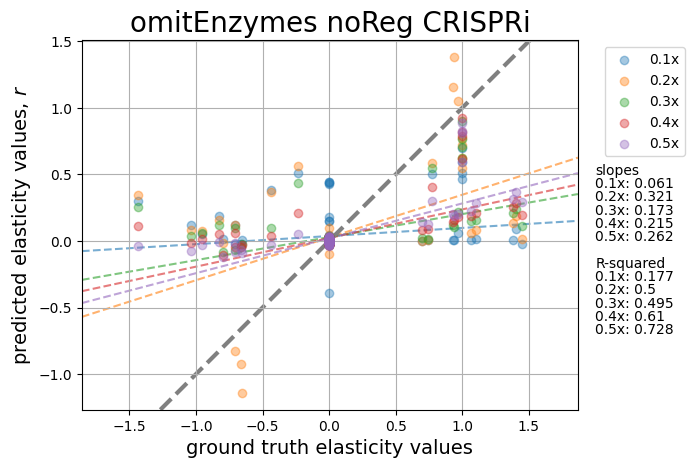

In [22]:
plt.axes().set_aspect('equal', 'datalim')

plt.scatter(elasticities_df['gt'], elasticities_df['0.1x'], alpha=0.4, label='0.1x', zorder=10)
plt.scatter(elasticities_df['gt'], elasticities_df['0.2x'], alpha=0.4, label='0.2x', zorder=10)
plt.scatter(elasticities_df['gt'], elasticities_df['0.3x'], alpha=0.4, label='0.3x', zorder=10)
plt.scatter(elasticities_df['gt'], elasticities_df['0.4x'], alpha=0.4, label='0.4x', zorder=10)
plt.scatter(elasticities_df['gt'], elasticities_df['0.5x'], alpha=0.4, label='0.5x', zorder=10)
# plt.scatter(elasticities_df['gt'], elasticities_df['1.01x'], alpha=0.4, label='1.01x', zorder=10)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('predicted elasticity values, $\it{r}$', size=14)
# plt.title('Parity plot of elasticity values for various \nenzyme perturbation strengths—CRISPRi', size=20)
plt.title('omitEnzymes noReg CRISPRi', size=20)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

left_adjust = 2
line_spacing = 0.1
slope_start = 0.5
r2_start = slope_start-(7*line_spacing)

plt.text(left_adjust, slope_start, "slopes")
for i, label in enumerate(pt_labels[0:5]):
    plt.text(left_adjust, (slope_start-line_spacing)-(i*line_spacing), f'{label}: {e_slopes[i]}')

plt.text(left_adjust, r2_start, 'R-squared')
for i, label in enumerate(pt_labels[0:5]):
    plt.text(left_adjust, (r2_start-line_spacing)-(i*line_spacing), f'{label}: {e_r2s[i]}')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i in range(5):
    plt.axline((0, e_intercepts[i]), slope=e_slopes[i], linestyle='--', alpha=0.6, color=colors[i], zorder=0)

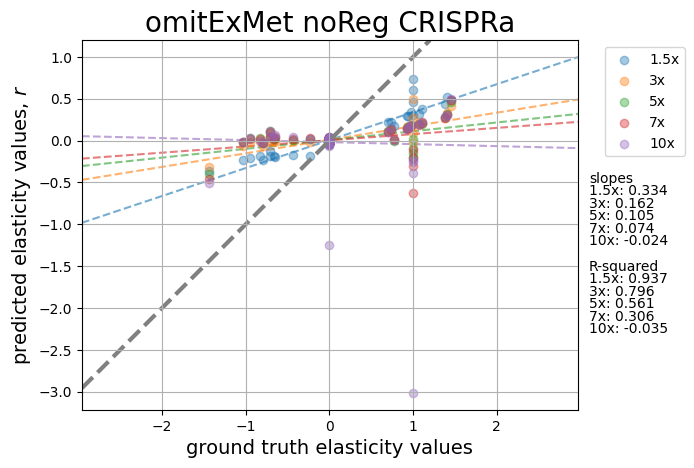

In [26]:
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(elasticities_df['gt'], elasticities_df['1.5x'], alpha=0.4, label='1.5x')
plt.scatter(elasticities_df['gt'], elasticities_df['3x'], alpha=0.4, label='3x')
plt.scatter(elasticities_df['gt'], elasticities_df['5x'], alpha=0.4, label='5x')
plt.scatter(elasticities_df['gt'], elasticities_df['7x'], alpha=0.4, label='7x')
plt.scatter(elasticities_df['gt'], elasticities_df['10x'], alpha=0.4, label='10x')

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1,linewidth=3)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('predicted elasticity values, $\it{r}$', size=14)
plt.title('omitExMet noReg CRISPRa', size=20)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

left_adjust = 3.1
line_spacing = 0.15
slope_start = -0.5
r2_start = slope_start-(7*line_spacing)

plt.text(left_adjust, slope_start, "slopes")
for i, label in enumerate(pt_labels[5:10]):
    plt.text(left_adjust, (slope_start-line_spacing)-(i*line_spacing), f'{label}: {e_slopes[i+5]}')

plt.text(left_adjust, r2_start, 'R-squared')
for i, label in enumerate(pt_labels[5:10]):
    plt.text(left_adjust, (r2_start-line_spacing)-(i*line_spacing), f'{label}: {e_r2s[i+5]}')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i in range(5):
    plt.axline((0, e_intercepts[i+5]), slope=e_slopes[i+5], linestyle='--', alpha=0.6, color=colors[i], zorder=0)

In [14]:
# running ANOVA on differences btw gt and predicted
# elasticities_df = elasticities_df.sub(elasticities_df['gt'], axis=0)
stats.f_oneway(elasticities_df['0.1x'],
                elasticities_df['0.2x'],
                elasticities_df['0.3x'],
                elasticities_df['0.4x'],
                elasticities_df['0.5x'],
                elasticities_df['1.5x'],
                elasticities_df['3x'],
                elasticities_df['5x'],
                elasticities_df['7x'],
                elasticities_df['10x'])

F_onewayResult(statistic=2.514849826321857, pvalue=0.0073336765151252115)

In [25]:
melted_elasticities = elasticities_df.reset_index().melt(id_vars=['index'], value_vars=['0.1x', '0.2x', '0.3x', '0.4x', '0.5x', '1.5x', '3x', '5x', '7x', '10x'])
melted_elasticities.head()

,index,variable,value
0,vKIL_B__,0.1x,0.300667
1,vKIL_E__,0.1x,0.007333
2,vKIL_K__,0.1x,0.024667
3,vKIL_G__,0.1x,0.000000
4,vKIL_I__,0.1x,0.000000


In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have a DataFrame named 'data' with your data
# 'dv' is the dependent variable column name
# 'iv' is the independent variable column name

model = ols('value ~ variable', data=melted_elasticities).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
eta_squared = anova_table['sum_sq'][0] / anova_table['sum_sq'].sum()

print(eta_squared)

0.012768373463323938


In [15]:
MAE = abs(elasticities_df.sub(elasticities_df['gt'], axis=0)).sum()/len(elasticities_df['gt'])
MAE

gt      0.000000
0.1x    0.150343
0.2x    0.116324
0.3x    0.122365
0.4x    0.116028
0.5x    0.109831
1.5x    0.099574
3x      0.124848
5x      0.135322
7x      0.140136
10x     0.161765
dtype: float64

Text(0.5, 1.0, 'MAE of elasticity predictions based\non enzyme perturbation strength')

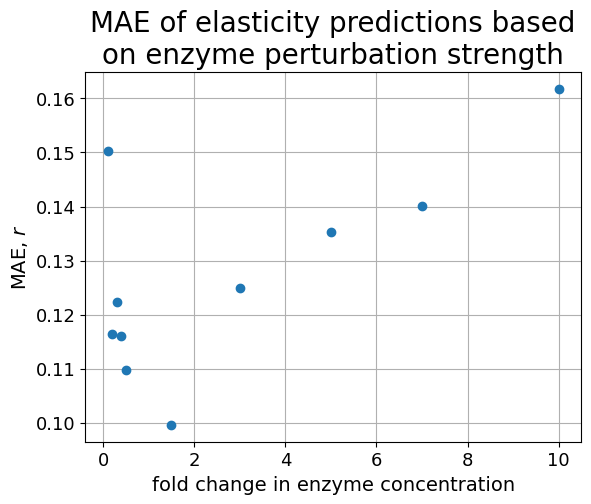

In [29]:
plt.scatter(pt_levels, MAE[1:].values, zorder=10)
plt.grid(True, which='both', axis='both', zorder=0)
# plt.xscale('log')
plt.xlabel('fold change in enzyme concentration', size=14)
plt.ylabel('MAE, $\it{r}$', size=14)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.title("MAE of elasticity predictions based\non enzyme perturbation strength", size=20)

In [27]:
MAE.to_csv('../../../data/results/MAE/topologyA-noReg_omitEnzymes_MAE.csv')

## Calculating FCCs

In [30]:
gtFCC = pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), index=r.getReactionIds(), columns=r.getReactionIds())

### Negative predictions

In [33]:
Ex01_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj01)['prior']['Ex'])
Ex02_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj02)['prior']['Ex'])
Ex03_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj03)['prior']['Ex'])
Ex04_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj04)['prior']['Ex'])
Ex05_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj05)['prior']['Ex'])

Ex15_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj15)['prior']['Ex'])
Ex3_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj3)['prior']['Ex'])
Ex5_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj5)['prior']['Ex'])
Ex7_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj7)['prior']['Ex'])
Ex100_prior = util.get_az_summary(util.run_prior_predictive(BMCA_obj100)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries

In [35]:
BMCA_obj01.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj02.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj03.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj04.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj05.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj15.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj3.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj5.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj7.en = pd.DataFrame(np.ones((17, 16)))
BMCA_obj100.en = pd.DataFrame(np.ones((17, 16)))


In [36]:
priorFCC01 = util.estimate_CCs(BMCA_obj01, Ex01_prior.reshape((16,-1)))
priorFCC02 = util.estimate_CCs(BMCA_obj02, Ex02_prior.reshape((16,-1)))
priorFCC03 = util.estimate_CCs(BMCA_obj03, Ex03_prior.reshape((16,-1)))
priorFCC04 = util.estimate_CCs(BMCA_obj04, Ex04_prior.reshape((16,-1)))
priorFCC05 = util.estimate_CCs(BMCA_obj05, Ex05_prior.reshape((16,-1)))

priorFCC15 = util.estimate_CCs(BMCA_obj15, Ex15_prior.reshape((16,-1)))
priorFCC3 = util.estimate_CCs(BMCA_obj3, Ex3_prior.reshape((16,-1)))
priorFCC5 = util.estimate_CCs(BMCA_obj5, Ex5_prior.reshape((16,-1)))
priorFCC7 = util.estimate_CCs(BMCA_obj7, Ex7_prior.reshape((16,-1)))
priorFCC100 = util.estimate_CCs(BMCA_obj100, Ex100_prior.reshape((16,-1)))


In [31]:
def estimate_CCs(BMCA_obj, Ex, med_et_advi):
    BMCA_obj.vn[BMCA_obj.vn == 0] = 1e-6
    
    a = np.diag(med_et_advi / BMCA_obj.vn.values)
    a = np.diag(a)
    a = a[np.newaxis,:].repeat(3000, axis=0)

    Ex_ss = a @ Ex
    As = BMCA_obj.N @ np.diag(BMCA_obj.v_star) @ Ex_ss
    bs = BMCA_obj.N @ np.diag(BMCA_obj.v_star)
    bs = bs[np.newaxis, :].repeat(3000, axis=0)
    
    As = at.as_tensor_variable(As)
    bs = at.as_tensor_variable(bs)

    def solve_aesara(A, b):
        rsolve_op = LeastSquaresSolve()
        return rsolve_op(A, b).squeeze()

    CCC, _ = aesara.scan(lambda A, b: solve_aesara(A, b),
                        sequences=[As, bs], strict=True)

    identity = np.eye(len(BMCA_obj.N.T))
    identity = identity[np.newaxis,:].repeat(3000, axis=0)
    
    FCC = (Ex_ss @ CCC.eval()) + identity
    
    return FCC


In [32]:
postFCC01 = estimate_CCs(BMCA_obj01, med_Ex01_advi.reshape((16,11)), med_et_advi_01)
postFCC02 = estimate_CCs(BMCA_obj02, med_Ex02_advi.reshape((16,11)), med_et_advi_02)
postFCC03 = estimate_CCs(BMCA_obj03, med_Ex03_advi.reshape((16,11)), med_et_advi_03)
postFCC04 = estimate_CCs(BMCA_obj04, med_Ex04_advi.reshape((16,11)), med_et_advi_04)
postFCC05 = estimate_CCs(BMCA_obj05, med_Ex05_advi.reshape((16,11)), med_et_advi_05)

postFCC15 = estimate_CCs(BMCA_obj15, med_Ex15_advi.reshape((16,11)), med_et_advi_15)
postFCC3 = estimate_CCs(BMCA_obj3, med_Ex3_advi.reshape((16,11)), med_et_advi_3)
postFCC5 = estimate_CCs(BMCA_obj5, med_Ex5_advi.reshape((16,11)), med_et_advi_5)
postFCC7 = estimate_CCs(BMCA_obj7, med_Ex7_advi.reshape((16,11)), med_et_advi_7)
postFCC100 = estimate_CCs(BMCA_obj100, med_Ex100_advi.reshape((16,11)), med_et_advi_100)

In [37]:
prior_FCCs = [priorFCC01, priorFCC02, priorFCC03, priorFCC04, priorFCC05, priorFCC15, priorFCC3, priorFCC5, priorFCC7, priorFCC100]
post_FCCs = [postFCC01, postFCC02, postFCC03, postFCC04, postFCC05, postFCC15, postFCC3, postFCC5, postFCC7, postFCC100]


## Evaluating FCC ranking

In [38]:
## ground truth FCC rankings

gtFCC=pd.DataFrame(r.getScaledFluxControlCoefficientMatrix(), columns=r.getReactionIds(), index=r.getReactionIds()).abs()
m1 = gtFCC.index.values[:, None] == gtFCC.columns.values
gtFCC = pd.DataFrame(np.select([m1], [float('Nan')], gtFCC), columns=gtFCC.columns, index=gtFCC.index)
gtFCC_rankings= gtFCC.rank(axis=1, ascending=False, na_option='keep')

a = gtFCC_rankings.loc['vYAN']

### via Spearman rank coefficients

In [39]:
spearman_coefficients = []
p_values = []
confidence_intervals = []
b_list = []
for FCC in prior_FCCs + post_FCCs:
    b = util.calculate_FCC_med_rankings(FCC, 'vYAN', r)
    b_list.append(b)
    spearman_r, p_value, lower_ci, upper_ci = util.bootstrap_spearman(a.dropna(), b.dropna())
    spearman_coefficients.append(spearman_r)
    p_values.append(p_value)
    confidence_intervals.append((lower_ci, upper_ci))


In [40]:
pt_labels = [i+'-prior' for i in pt_labels] + [i+'-post' for i in pt_labels]

In [41]:
spearman_df = pd.DataFrame(spearman_coefficients, columns=['r'], index=pt_labels)
spearman_df['p-value'] = p_values
spearman_df['lower'] = [i[0] for i in confidence_intervals]
spearman_df['upper'] = [i[1] for i in confidence_intervals]
spearman_df

,r,p-value,lower,upper
0.1x-prior,0.317857,2.482906e-01,-0.307999,0.792755
0.2x-prior,0.300000,2.773168e-01,-0.330203,0.773440
0.3x-prior,0.185714,5.075410e-01,-0.464361,0.749125
0.4x-prior,0.167857,5.498556e-01,-0.483569,0.713807
0.5x-prior,0.325000,2.372254e-01,-0.303842,0.810975
1.5x-prior,0.360714,1.865544e-01,-0.263541,0.801534
3x-prior,0.092857,7.420450e-01,-0.607555,0.658862
5x-prior,0.264286,3.411738e-01,-0.382062,0.734569
7x-prior,0.160714,5.671967e-01,-0.537105,0.670887
10x-prior,0.117857,6.757115e-01,-0.539862,0.696546


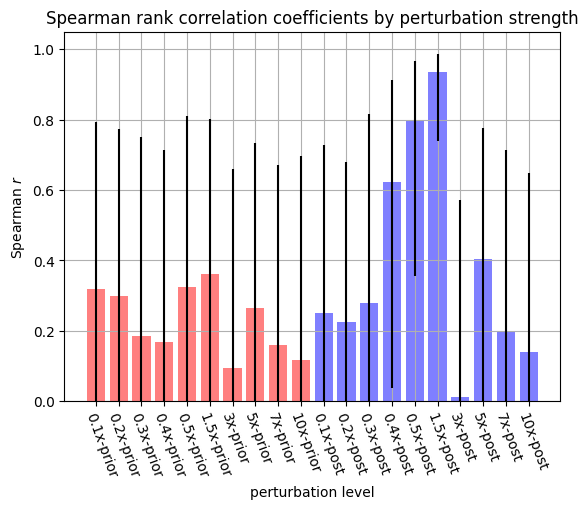

In [42]:
plt.bar(pt_labels, [i for i in spearman_coefficients], alpha=0.5, color=['r']*10 + ['b']*10)
plt.grid()

for i, val in enumerate(spearman_df['r']):
    if val < 0: 
        c ='gray'
    else: 
        c='k'
    plt.vlines(pt_labels[i], spearman_df['lower'][i], spearman_df['upper'][i], color=c)

for i, val in enumerate(spearman_df['r']):
    if val < 0: 
        plt.annotate(round(val, 2), (pt_labels[i], 0.02), size=8, ha='center', rotation=30,rotation_mode="anchor")

plt.title("Spearman rank correlation coefficients by perturbation strength")
plt.xlabel('perturbation level')
plt.ylabel('Spearman $\it{r}$')
plt.ylim((0, 1.05))

_=plt.xticks(rotation=-70,ha='left',rotation_mode="anchor")

In [43]:
spearman_df.to_csv('../../../data/results/spearman_coefficients/topologyA_noReg_omitEnzymes_spr.csv')

### evaluating top 10 rankings

In [44]:
b_list = []
for FCC in prior_FCCs + post_FCCs:
    b = util.calculate_FCC_med_rankings(FCC, 'vYAN', r)
    b_list.append(b)

ranked_b_list = [b.sort_values().reset_index().set_index('vYAN') for b in b_list]
q = pd.concat(ranked_b_list, axis=1)
q['gt'] = a.sort_values().reset_index().set_index('vYAN')
q.columns = pt_labels + ['gt']
q = q[['gt'] + pt_labels]
q.head(15) ## top 15 table

,gt,0.1x-prior,0.2x-prior,0.3x-prior,0.4x-prior,0.5x-prior,1.5x-prior,3x-prior,5x-prior,7x-prior,...,0.1x-post,0.2x-post,0.3x-post,0.4x-post,0.5x-post,1.5x-post,3x-post,5x-post,7x-post,10x-post
vYAN,,,,,,,,,,,,,,,,,,,,,
1.0,vWHI,vWHI,vWHI,vWHI,vWHI,vWHI,vWHI,vWHI,vWHI,vWHI,...,vKIL,vKIL,vVIC,vQUE,vWHI,vQUE,vALP,vALP,vALP,vLIM
2.0,vQUE,vOSC,vOSC,vUNI,vTAN,vQUE,vROM,vVIC,vROM,vSIE,...,vNOV,vNOV,vALP,vALP,vQUE,vWHI,vNOV,vLIM,vLIM,vALP
3.0,vLIM,vUNI,vUNI,vQUE,vUNI,vSIE,vQUE,vUNI,vTAN,vROM,...,vQUE,vPAP,vLIM,vWHI,vALP,vALP,vVIC,vNOV,vNOV,vSIE
4.0,vALP,vQUE,vQUE,vVIC,vQUE,vTAN,vSIE,vSIE,vSIE,vTAN,...,vWHI,vTAN,vUNI,vLIM,vLIM,vLIM,vKIL,vKIL,vKIL,vVIC
5.0,vROM,vKIL,vTAN,vTAN,vSIE,vROM,vTAN,vROM,vQUE,vUNI,...,vSIE,vLIM,vWHI,vVIC,vOSC,vROM,vPAP,vQUE,vROM,vNOV
6.0,vOSC,vALP,vVIC,vOSC,vVIC,vVIC,vUNI,vTAN,vUNI,vVIC,...,vTAN,vALP,vKIL,vNOV,vUNI,vNOV,vUNI,vPAP,vUNI,vQUE
7.0,vNOV,vNOV,vSIE,vSIE,vROM,vUNI,vVIC,vQUE,vVIC,vQUE,...,vOSC,vOSC,vPAP,vKIL,vZUL,vOSC,vLIM,vSIE,vZUL,vTAN
8.0,vPAP,vTAN,vROM,vROM,vOSC,vOSC,vLIM,vPAP,vPAP,vPAP,...,vALP,vWHI,vQUE,vROM,vNOV,vKIL,vQUE,vUNI,vVIC,vKIL
9.0,vSIE,vZUL,vLIM,vLIM,vLIM,vPAP,vPAP,vLIM,vLIM,vLIM,...,vROM,vQUE,vOSC,vZUL,vPAP,vZUL,vSIE,vWHI,vSIE,vPAP


In [45]:
q.to_csv('../../../data/results/rankings/topologyA-noReg_omitEnzymes_rankings.csv')
rank_df = pd.read_csv('../../../data/results/rankings/topologyA-noReg_omitEnzymes_rankings.csv')

In [46]:
topTen_df = rank_df[rank_df['vYAN'].isin([1,2,3,4,5,6,7,8,9,10])]

gt_t10_set = set(list(topTen_df['gt']))

t10_sets = []
for pt in pt_labels: 
    t10_sets.append(set(list(topTen_df[pt])))

t10_scores=[]
for i in t10_sets: 
    t10_scores.append(len(set.intersection(gt_t10_set, i)))

t10_results = pd.DataFrame((np.array(t10_scores)).reshape((len(pt_labels),-1)).T, 
             columns=pt_labels)
t10_results ## number of correct predictions of top 10 FCC values 

,0.1x-prior,0.2x-prior,0.3x-prior,0.4x-prior,0.5x-prior,1.5x-prior,3x-prior,5x-prior,7x-prior,10x-prior,0.1x-post,0.2x-post,0.3x-post,0.4x-post,0.5x-post,1.5x-post,3x-post,5x-post,7x-post,10x-post
0,6,7,7,7,7,7,7,7,7,7,8,7,7,8,9,9,7,7,7,6


In [47]:
# difference
dif_list = []
for i in t10_sets: 
    dif_list.append(i.difference(gt_t10_set))

for i in dif_list: 
    print(rank_df['gt'].loc[lambda x: x.isin(i)].index)

Int64Index([10, 11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([11, 12, 13], dtype='int64')
Int64Index([10, 12], dtype='int64')
Int64Index([10, 12, 14], dtype='int64')
Int64Index([10, 11, 13], dtype='int64')
Int64Index([10, 13], dtype='int64')
Int64Index([11], dtype='int64')
Int64Index([10], dtype='int64')
Int64Index([10, 11, 13], dtype='int64')
Int64Index([10, 11, 13], dtype='int64')
Int64Index([10, 11, 13], dtype='int64')
Int64Index([10, 11, 12, 13], dtype='int64')
